## Data Distribution Analysis
This notebook analyzes the distribution of data in a given dataset. It provides insights into the frequency of different values in each column.

#### 💡 About the Dataset
https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset

##### ✨ What we have?
The data consists of MRI images. The data has four classes(Labels) of images both in training and a testing set:
1. Non Demented
2. Very Mild Demented
3. Mild Demented
4. Moderate Demented

##### ✨ Augmented Data
Augmented data is artificially created data that is generated from the original data.
1. resizing
2. rotation
3. zooming
4. flipping
5. shifting ...
Purpose of data augmentation is to increase the diversity of the training set and improve the model's ability to generalize to new data.

##### ✨ EDA on the Dataset
1. Categorical Data Analysis: How many images are there in each class? Are they balanced or imbalanced?
2. Sample images visualization: How do the images look like in each class? How about the quality of the images?
3. Image properties analysis: What are the dimensions, color channels, and pixel intensity distributions of the images?
4. Future affecting factors: Do we need resize or normalize or class weights?

#### Step 1: Import Libraries
1. pathlib： For handling file paths.
2. PIL: For image processing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from PIL.ImageColor import colormap

#### Step 2: Define Data Paths

In [2]:
DATA_DIR = Path('./dataset/AugmentedAlzheimerDataset') # make sure to change the path accordingly
print("Data dir exists:", DATA_DIR.exists())
print("Data Directory:", DATA_DIR)
# print the subdirectories
for label in DATA_DIR.iterdir(): # iterdir() to iterate through subdirectories, not recursive, which is labels in our case
    if label.is_dir(): # check if it's a directory
        print("Label:", label.name)

Data dir exists: True
Data Directory: dataset/AugmentedAlzheimerDataset
Label: VeryMildDemented
Label: ModerateDemented
Label: MildDemented
Label: NonDemented


#### Step 3: Iterate through the dataset and collect image data

In [3]:
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp"}
images_path = []
for img_path in DATA_DIR.rglob("*"): # rglob to search recursively，* matches all files
    if img_path.suffix.lower() in IMG_EXTS: # check if the file is an image
        images_path.append(img_path)
print("Total images found:", len(images_path))
print("Example image path:", images_path[0])

Total images found: 33984
Example image path: dataset/AugmentedAlzheimerDataset/VeryMildDemented/2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg


#### Step 4: Build DataFrame

In [4]:
rows = []
for img_path in images_path:
    file_path = str(img_path)
    file_name = img_path.name
    label = img_path.parent.name # get the parent directory name as label
    rows.append({
        "file_path": file_path,
        "file_name": file_name,
        "label": label
    }) # row is a list of dictionaries

df = pd.DataFrame(rows)
df.head()

,file_path,file_name,label
0,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg,VeryMildDemented
1,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,59bfe517-a5b4-4dd3-8e32-07fba7a77aa9.jpg,VeryMildDemented
2,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,ef1d73c2-679f-4421-b7c5-06881d487cf0.jpg,VeryMildDemented
3,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,716c42f4-f92c-40cd-9088-6254973a6665.jpg,VeryMildDemented
4,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,f897246c-1263-479b-8fe0-351e98cf7c9c.jpg,VeryMildDemented


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  33984 non-null  object
 1   file_name  33984 non-null  object
 2   label      33984 non-null  object
dtypes: object(3)
memory usage: 796.6+ KB


#### Step 5: Analyze Data Distribution
1. Count the number of images in each class
2. Check if the classes are balanced or imbalanced
3. Determine if any preprocessing steps are needed based on the distribution

In [6]:
label_counts = df["label"].value_counts()
label_counts

label
NonDemented         9600
VeryMildDemented    8960
MildDemented        8960
ModerateDemented    6464
Name: count, dtype: int64

##### Moderate Demented has the least number of images, which may lead to class imbalance issues during model training.

#### Step 6: Data Distribution Plots

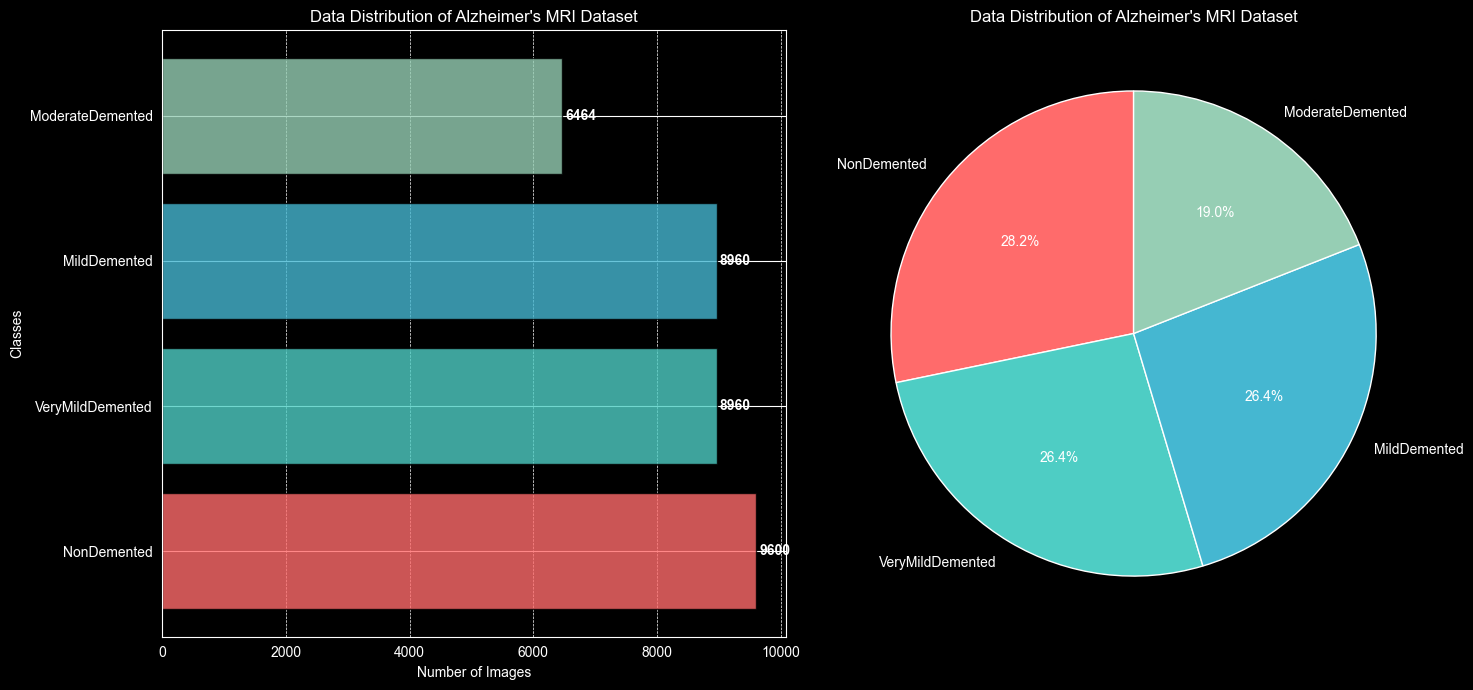

In [8]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
# Horizontal Bar Chart with different colors for each bar
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']  # Different colors for each class
bars = axes[0].barh(label_counts.index, label_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_title("Data Distribution of Alzheimer's MRI Dataset")
axes[0].set_xlabel("Number of Images")
axes[0].set_ylabel("Classes")
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)
# Add value labels on each bar
for bar, value in zip(bars, label_counts.values):
    axes[0].text(value + 50, bar.get_y() + bar.get_height()/2, str(value),
                 va='center', ha='left', fontsize=10, fontweight='bold')
# Pie Chart
ratio = (label_counts/label_counts.sum()) * 100
axes[1].pie(ratio.values, labels=ratio.index, autopct="%.1f%%", startangle=90, colors=colors)
axes[1].set_title("Data Distribution of Alzheimer's MRI Dataset")

plt.tight_layout()
plt.show()

#### Step 7: Display ramdom 16 sample images from each class

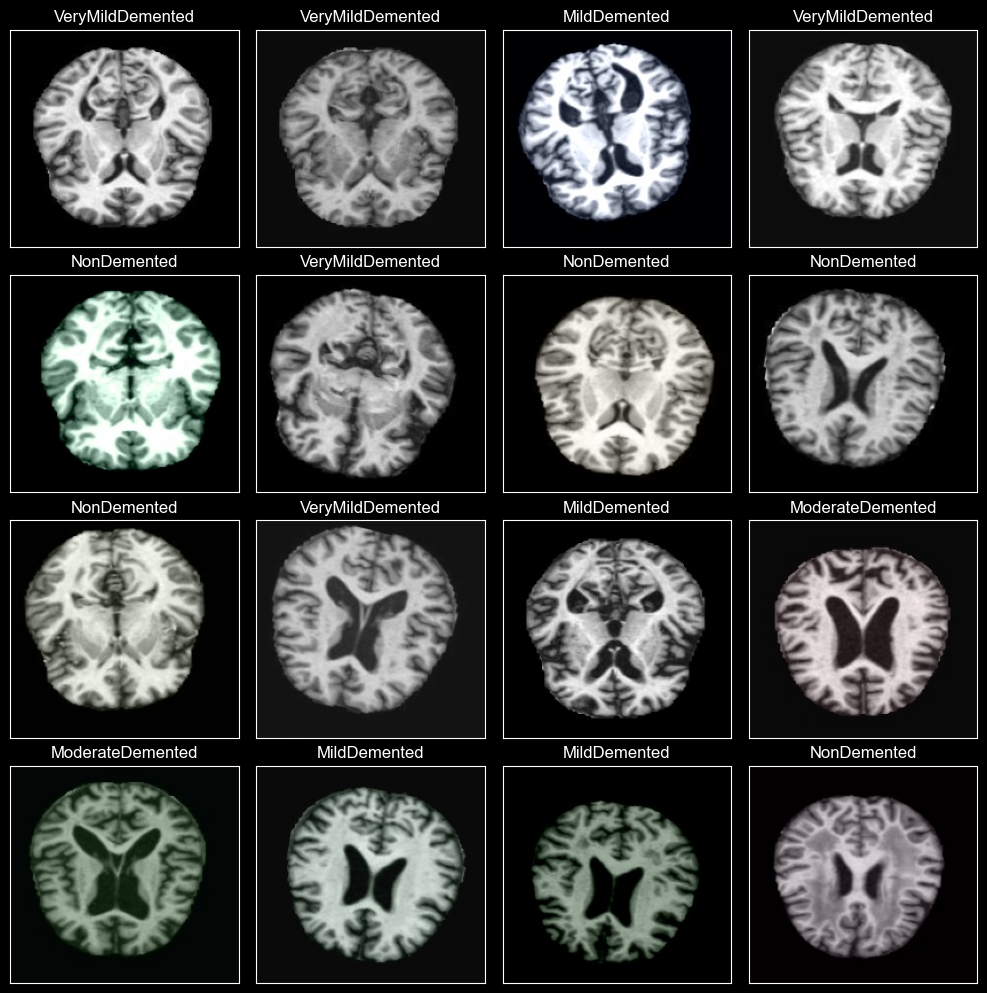

In [10]:
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["file_path"][random_index[i]]))
    ax.set_title(df["label"][random_index[i]])
plt.tight_layout()
plt.show()

#### Step 8: Image Properties Analysis
1. Image Size
2. L or RGB
  - L: **Luminance(Brightness)** mode for grayscale images; data structure: **1 channel(0-255)**, shape: **(height, width)**
  - RGB: **Red, Green, Blue mode** for color images, data structure: **3 channels(0-255, 0-255, 0-255)**, shape: **(height, width, 3)**
3. Future processing strategies:
  - Resize: If images have varying sizes, resizing them to a common size may be necessary for model training.
  - Normalize: Normalizing pixel values to a **standard range (e.g., 0-1)** can help improve model convergence.
  - Channel Conversion: **1 channel <-> 3 channels** based on model requirements; and **HWC vs CHW**

##### 8.1 Get Image Sizes and Color Channels

In [11]:
# Copy the original dataframe
df_size = df.copy()
# Initialize lists to store image properties
widths = []
heights = []
modes = []

# Iterate through each image and collect properties
for img_path in df_size["file_path"]:
    with Image.open(img_path) as img:
        width, height = img.size # return (width, height)
        mode = img.mode # return image mode
        widths.append(width)
        heights.append(height)
        modes.append(mode)

# Add properties to the dataframe
df_size["width"] = widths
df_size["height"] = heights
df_size["mode"] = modes
df_size.head(10)

,file_path,file_name,label,width,height,mode
0,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg,VeryMildDemented,200,190,RGB
1,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,59bfe517-a5b4-4dd3-8e32-07fba7a77aa9.jpg,VeryMildDemented,200,190,RGB
2,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,ef1d73c2-679f-4421-b7c5-06881d487cf0.jpg,VeryMildDemented,180,180,RGB
3,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,716c42f4-f92c-40cd-9088-6254973a6665.jpg,VeryMildDemented,180,180,RGB
4,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,f897246c-1263-479b-8fe0-351e98cf7c9c.jpg,VeryMildDemented,200,190,RGB
5,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,d0430f60-cb95-4705-9763-a55ff286e955.jpg,VeryMildDemented,200,190,RGB
6,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,009d5533-8f7b-4954-a6f7-db5ad21ed462.jpg,VeryMildDemented,200,190,RGB
7,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,98a2791c-fe79-4fdf-8c4f-a74fb677cee5.jpg,VeryMildDemented,200,190,RGB
8,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,212610a9-8e7d-4004-b97b-286f61f0503e.jpg,VeryMildDemented,180,180,RGB
9,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,6e4cb453-56ac-4885-b1f1-6da7a275b623.jpg,VeryMildDemented,200,190,RGB


##### 8.2 Analyze Image Sizes

In [12]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  33984 non-null  object
 1   file_name  33984 non-null  object
 2   label      33984 non-null  object
 3   width      33984 non-null  int64 
 4   height     33984 non-null  int64 
 5   mode       33984 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [13]:
df_size[["width", "height"]].describe()

,width,height
count,33984.000000,33984.000000
mean,196.233522,188.116761
std,7.819527,3.909764
min,180.000000,180.000000
25%,200.000000,190.000000
50%,200.000000,190.000000
75%,200.000000,190.000000
max,200.000000,190.000000


In [14]:
mode_counts = df_size["mode"].value_counts()
mode_counts

mode
RGB    33984
Name: count, dtype: int64

##### 8.3 Image Size Distribution Plots

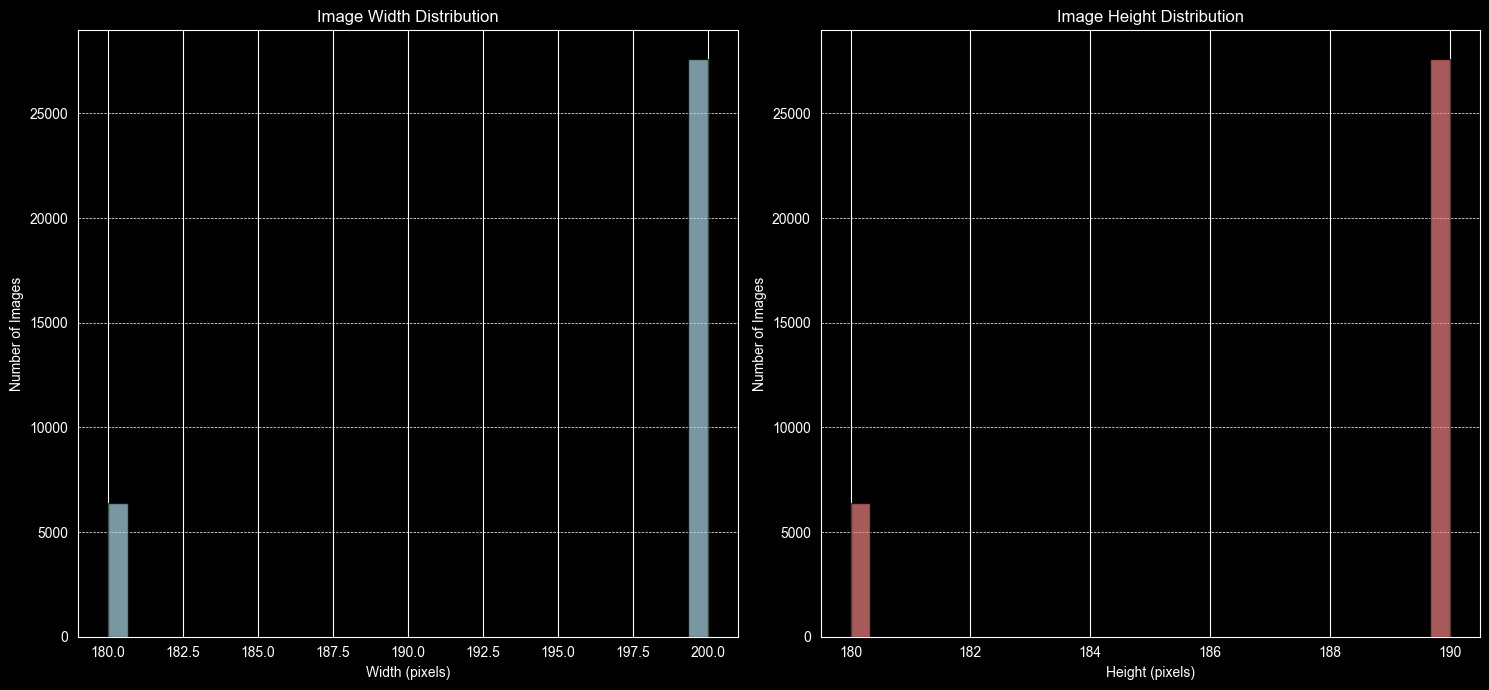

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
# Width Distribution
axes[0].hist(df_size["width"], bins=30, color="lightblue", edgecolor='black', alpha=0.7)
axes[0].set_title("Image Width Distribution")
axes[0].set_xlabel("Width (pixels)")
axes[0].set_ylabel("Number of Images")
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
# Height Distribution
axes[1].hist(df_size["height"], bins=30, color="lightcoral", edgecolor='black', alpha=0.7)
axes[1].set_title("Image Height Distribution")
axes[1].set_xlabel("Height (pixels)")
axes[1].set_ylabel("Number of Images")
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Step 9: Future Processing Strategies
1. Resize: Image size analysis shows that images in the dataset have multiple resolutions (e.g., 180×180 and 200×190). Since convolutional neural networks require fixed-size inputs, all images will be resized to a unified resolution before training.
2. Normalize: Pixel intensity values range from 0 to 255. Normalizing these values to a range of 0 to 1 will help improve model convergence during training.
```
pixel_normalized = pixel_value / 255.0
```
3. Channel Conversion: Since all images are in RGB mode (3 channels), no channel conversion is needed.